# 4.10 Coding Etiquette & Excel Reporting

## This script contains:
### 1. Importing data
### 2. Drop columns containg PII
### 3. Create a regional segmentation of the data
### 4. Create activity flag and exclude customers with low activity
### 5. Create a profiling variable
### 6. Create a visual of profile distribution
### 7. Aggregate the max, mean, and min variables on a customer-profile level
### 8. Compare customer profiles with regions and departments
### 9. Produce charts to illustrate results
### 10. Export final report data
### 11. Checking Frequencies for Final Report
### 12. Create Visualizations for Final Report

In [120]:
### Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 01. Importing Data

In [2]:
# Define path

path = '/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 4/Instacart Basket Analysis'

In [5]:
# Import final data set

ords_prods_custs = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','ords_prods_cust.pkl'))

In [26]:
# Import departments

departments = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [7]:
# Check output

ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [24]:
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   order_day_of_week              int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   first_order                    bool    
 7   product_id                     int64   
 8   add_to_cart_order              int64   
 9   reordered                      int64   
 10  product_name                   object  
 11  aisle_id                       float64 
 12  department_id                  float64 
 13  prices                         float64 
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    

### 02. Drop columns containing PII

In [49]:
ords_prods_custs_secure = ords_prods_custs.drop(columns=['first_name', 'last_name'])

In [50]:
#check the output

ords_prods_custs_secure.shape

(32404859, 34)

In [51]:
ords_prods_custs.shape

(32404859, 36)

### 03. Create a regional segmentation of the data

In [52]:
# Create a column for region

result = []

for value in ords_prods_custs_secure["state"]:
  if value in['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
    result.append("Northeast")
  elif value in['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
    result.append("Midwest")
  elif value in['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
    result.append("South")
  else:
    result.append("West")

In [53]:
ords_prods_custs_secure['region'] = result

In [54]:
ords_prods_custs_secure['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [55]:
# create a crosstab of region and spending

crosstab = pd.crosstab(ords_prods_custs_secure['region'], ords_prods_custs_secure['spending_flag'], dropna = False)

In [36]:
# copy crosstab

crosstab.to_clipboard()

### 04. Create activity flag and exclude customers with low activity

In [56]:
# create an activity flag based on the max_order field

ords_prods_custs_secure.loc[ords_prods_custs_secure['max_order'] >= 5, 'activity_flag'] = 'High activity'
ords_prods_custs_secure.loc[ords_prods_custs_secure['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [57]:
ords_prods_custs_secure['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [58]:
# create a new dataframe for high activity customers

ords_prods_custs_high = ords_prods_custs_secure.loc[ords_prods_custs['activity_flag'] == 'High activity']

In [59]:
# Check the output

ords_prods_custs_high.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity


In [60]:
ords_prods_custs_high.shape

(30964564, 34)

In [61]:
# Export new dataframe

ords_prods_custs_high.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_custs_high.pkl'))

In [62]:
# create a new dataframe for low activity customers

ords_prods_custs_low = ords_prods_custs_secure.loc[ords_prods_custs['activity_flag'] == 'Low activity']

In [63]:
# check the output

ords_prods_custs_low.shape

(1440295, 34)

In [64]:
# Export new dataframe

ords_prods_custs_low.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_custs_low.pkl'))

### 05. Create a profiling variable

In [82]:
# create a profile variable flag

ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] >= 18) & (ords_prods_custs_secure['n_dependants'] < 1) & (ords_prods_custs_secure['marital_status'] == 'living with parents and siblings'), 'profile_flag'] = 'Single dependant adult'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] <= 40) & (ords_prods_custs_secure['n_dependants'] >= 1) & (ords_prods_custs_secure['marital_status'] == 'married'), 'profile_flag'] = 'Married young parent'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] > 40) & (ords_prods_custs_secure['n_dependants'] >= 1) & (ords_prods_custs_secure['marital_status'] == ('single','divorced/widowed')), 'profile_flag'] = 'Single mature parent'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] > 40) & (ords_prods_custs_secure['n_dependants'] >= 1) & (ords_prods_custs_secure['marital_status'] == 'married'), 'profile_flag'] = 'Married mature parent'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] >= 18) & (ords_prods_custs_secure['n_dependants'] < 1) & (ords_prods_custs_secure['marital_status'] == 'married'), 'profile_flag'] = 'Married adult, no kids'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] >= 18) & (ords_prods_custs_secure['n_dependants'] >= 1) & (ords_prods_custs_secure['marital_status'] == 'living with parents and siblings'), 'profile_flag'] = 'Dependant adult parent'


In [83]:
# check the output

ords_prods_custs_secure['profile_flag'].value_counts(dropna = False)

Married mature parent     15543917
NaN                        8097503
Married young parent       7212836
Dependant adult parent     1550603
Name: profile_flag, dtype: int64

In [100]:
# recode single adult profiles

ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] >= 18) & (ords_prods_custs_secure['n_dependants'] == 0) & (ords_prods_custs_secure['marital_status'] == 'single'), 'profile_flag'] = 'Single independent adult'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] >= 18) & (ords_prods_custs_secure['n_dependants'] == 0) & (ords_prods_custs_secure['marital_status'] == 'divorced/widowed'), 'profile_flag'] = 'Single independent adult'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] > 40) & (ords_prods_custs_secure['n_dependants'] >= 1) & (ords_prods_custs_secure['marital_status'] == 'single'), 'profile_flag'] = 'Single mature parent'
ords_prods_custs_secure.loc[(ords_prods_custs_secure['age'] > 40) & (ords_prods_custs_secure['n_dependants'] >= 1) & (ords_prods_custs_secure['marital_status'] == 'divorced/widowed'), 'profile_flag'] = 'Single mature parent'


In [101]:
# check the output

ords_prods_custs_secure['profile_flag'].value_counts(dropna = False)

Married mature parent       15543917
Single independent adult     8097503
Married young parent         7212836
Dependant adult parent       1550603
Name: profile_flag, dtype: int64

### 06. Create a visual of profile distribution

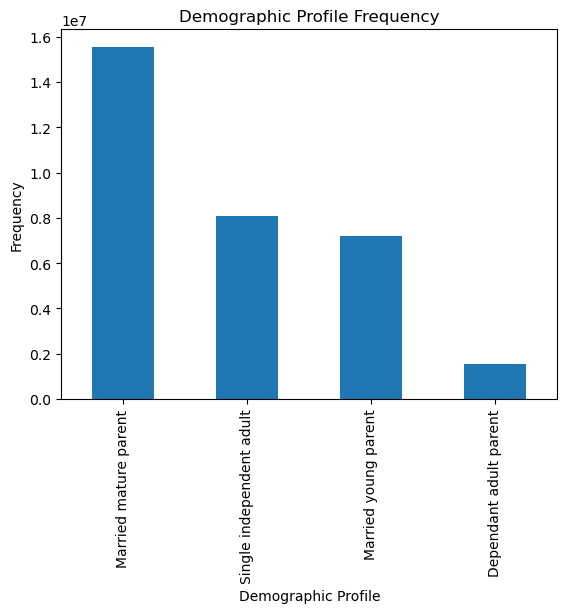

In [102]:
# Create bar chart of profile frequency

bar_profile = ords_prods_custs_secure['profile_flag'].value_counts().plot.bar()
plt.xlabel("Demographic Profile")
plt.ylabel("Frequency")
plt.title("Demographic Profile Frequency") # You can comment this line out if you don't need title
plt.show(bar_profile)

In [103]:
# export bar_profile

bar_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile.png'))

### 07. Aggregate the max, mean, and min variables on a customer-profile level

In [104]:
# aggregate profiles based on number of orders

ords_prods_custs_secure.groupby('profile_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                                 mean min max
profile_flag                                 
Dependant adult parent      17.296372   1  99
Married mature parent       17.042466   1  99
Married young parent        17.187020   1  99
Single independent adult    17.264622   1  99

In [106]:
# aggregate profiles based on prices

ords_prods_custs_secure.groupby('profile_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                              mean  min   max
profile_flag                                 
Dependant adult parent    7.800712  1.0  25.0
Married mature parent     7.792887  1.0  25.0
Married young parent      7.785970  1.0  25.0
Single independent adult  7.789975  1.0  25.0

### 08. Compare customer profiles with regions and departments

In [111]:
# create a crosstab of profile and department

crosstab_2 = pd.crosstab(ords_prods_custs_secure['profile_flag'], ords_prods_custs_secure['department_id'], dropna = False)

In [110]:
# copy crosstab to clipboard

crosstab_2.to_clipboard()

In [112]:
# create a crosstab of profile and region

crosstab_3 = pd.crosstab(ords_prods_custs_secure['profile_flag'],ords_prods_custs_secure['region'],dropna = False)

In [113]:
# copy crosstab to clipboard

crosstab_3.to_clipboard()

### 09. Produce charts to illustrate results

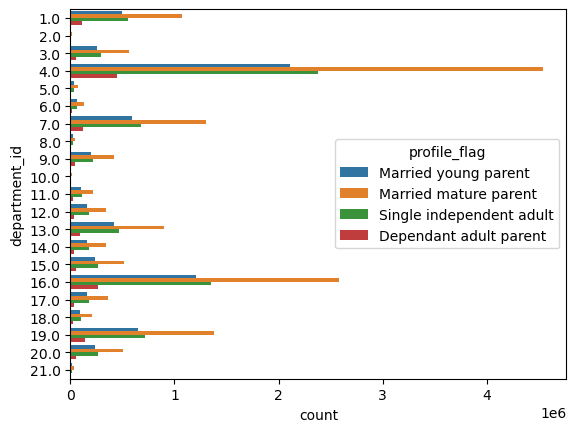

In [117]:
# Draw a countplot by department and profile

countplot_1 = sns.countplot(data=ords_prods_custs_secure, y="department_id", hue="profile_flag")

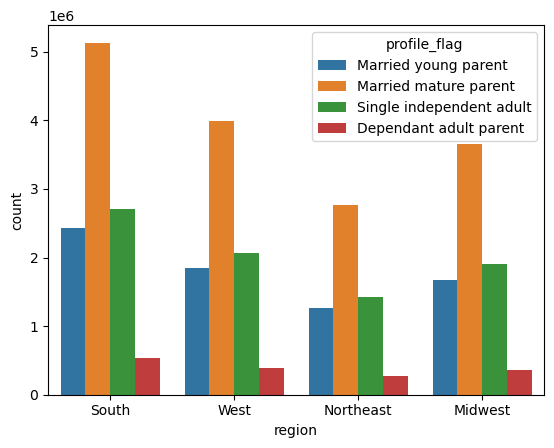

In [119]:
# Draw a countplot by region and profile

countplot_2 = sns.countplot(data=ords_prods_custs_secure, x="region", hue="profile_flag")

In [121]:
# export charts

countplot_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_profile.png'))
countplot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_profile.png'))

### 10. Export final data

In [122]:
# Export final dataset

ords_prods_custs_secure.to_pickle(os.path.join(path,'02 Data','Prepared Data','Final Project Dataset.pkl'))

### 11. Check Frequencies for Final Report

In [9]:
# Check frequency of 'price_rang_loc'

ords_prods_custs['price_range_loc'].value_counts(dropna = False)

Mid-Range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [10]:
# Check frequency of 'busiest_day'

ords_prods_custs['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

In [11]:
# Check frequency of 'busiest_days'

ords_prods_custs['busiest_days'].value_counts(dropna = False)

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [12]:
# Check frequency of 'busiest_period_of_day'

ords_prods_custs['busiest_period_of_day'].value_counts(dropna = False)

Most orders       16128666
Average orders    15679865
Fewest orders       596328
Name: busiest_period_of_day, dtype: int64

In [13]:
# Check frequency of 'loyalty_flag'

ords_prods_custs['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [14]:
# Check frequency of 'spending_flag'

ords_prods_custs['spending_flag'].value_counts(dropna = False)

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

In [15]:
# Check frequency of 'frequency_flag'

ords_prods_custs['frequency_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: frequency_flag, dtype: int64

### 12. Create Visualizations for Final Report

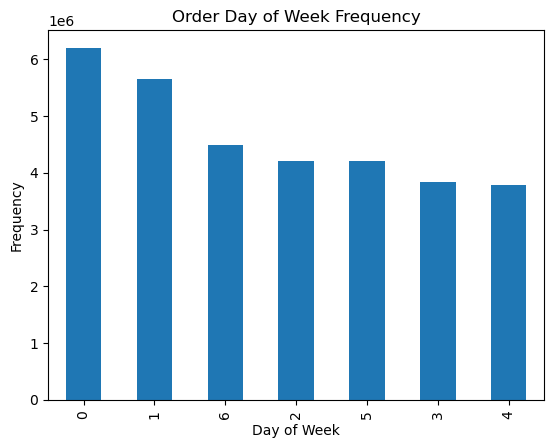

In [20]:
# Create bar chart of order day of week frequency

bar_day_of_week = ords_prods_custs['order_day_of_week'].value_counts().plot.bar()
plt.xlabel("Day of Week")
plt.ylabel("Frequency")
plt.title("Order Day of Week Frequency") # You can comment this line out if you don't need title
plt.show(bar_day_of_week)

In [19]:
# export bar_day_of_week

bar_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_labels.png'))

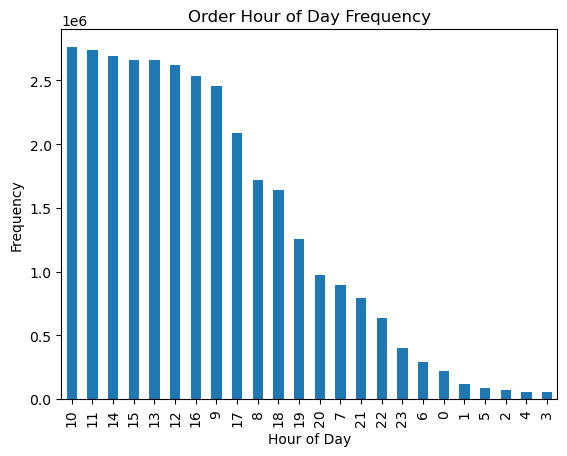

In [22]:
# Create bar chart of order hour of day frequency

bar_hour_of_day = ords_prods_custs['order_hour_of_day'].value_counts().plot.bar()
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.title("Order Hour of Day Frequency") # You can comment this line out if you don't need title
plt.show(bar_hour_of_day)

In [23]:
# export bar_hour_of_day

bar_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_hour_of_day.png'))

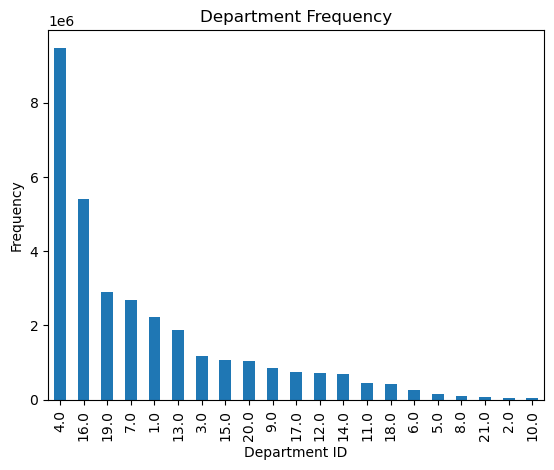

In [27]:
# Create bar chart of department frequency

bar_department = ords_prods_custs['department_id'].value_counts().plot.bar()
plt.xlabel("Department ID")
plt.ylabel("Frequency")
plt.title("Department Frequency") # You can comment this line out if you don't need title
plt.show(bar_department)

In [28]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [29]:
# export bar_department

bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_frequency.png'))

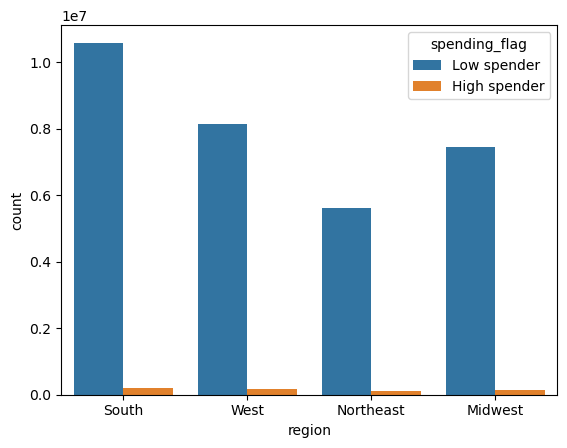

In [123]:
# Draw a countplot by region and spending flag

countplot_3 = sns.countplot(data=ords_prods_custs_secure, x="region", hue="spending_flag")

In [124]:
# export region and spending flag bar chart

countplot_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending.png'))

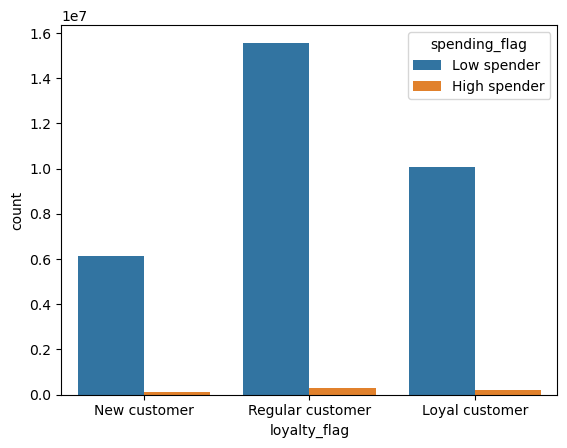

In [126]:
# Draw a countplot by loyalty flag and spending flag

countplot_4 = sns.countplot(data=ords_prods_custs_secure, x="loyalty_flag", hue="spending_flag")

In [127]:
# export loyalty and spending flag bar chart

countplot_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_spending.png'))

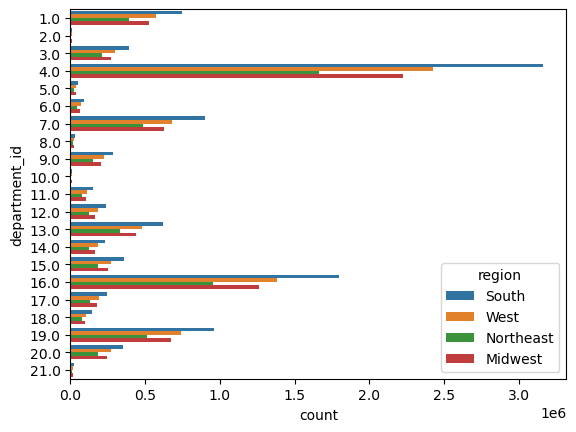

In [129]:
# Draw a countplot by department and region

countplot_5 = sns.countplot(data=ords_prods_custs_secure, y="department_id", hue="region")

In [130]:
# export department and region bar chart

countplot_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_region.png'))

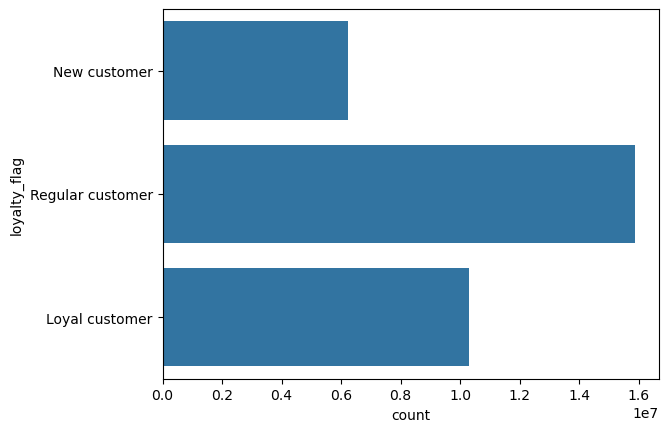

In [135]:
# Draw a countplot by department and region

countplot_6 = sns.countplot(data=ords_prods_custs_secure, y="loyalty_flag", color = 'tab:blue')

In [136]:
# export loyalty flag bar chart

countplot_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

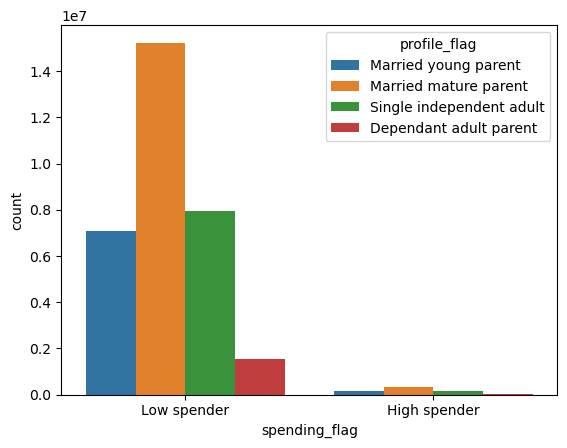

In [137]:
# Draw a countplot by profile and spending

countplot_7 = sns.countplot(data=ords_prods_custs_secure, x="spending_flag", hue="profile_flag")

In [138]:
# export profile spending bar chart

countplot_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_spending.png'))

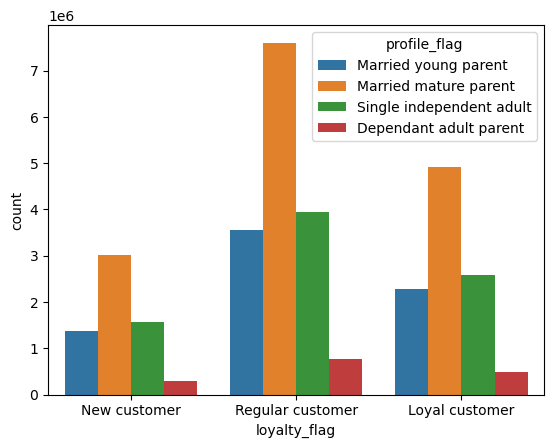

In [139]:
# Draw a countplot by profile and loyalty

countplot_8 = sns.countplot(data=ords_prods_custs_secure, x="loyalty_flag", hue="profile_flag")

In [140]:
# export profile loyalty bar chart

countplot_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_loyalty.png'))